In [1]:
from numpy import loadtxt
import matplotlib.pyplot as plt
from lagrange import Lagrange
from scipy import linspace
from scipy.interpolate import interp1d

In [2]:
a = loadtxt("datafile.dat")

xinterp = linspace(min(a[:,0]),max(a[:,0]),500)

Lg = Lagrange()
punt = Lg.funcion(a[:,0], a[:,1], xinterp)

aux = punt[0]
cont = 0
for i in range(len(punt)):
    if aux < punt[i]:
        aux = punt[i]
        cont = i
Er = aux
Erx = xinterp[cont]
med = Er/2

In [3]:
aux1 = 0
aux2 = 0
gamma = 0
for i in range(len(punt)//2):
    if punt[cont-i] < med:
        aux1 = cont-i
        break
for i in range(len(punt)//2):
    if punt[cont+i] < med:
        aux2 = cont+i
        break
gamma = xinterp[aux2-1]-xinterp[aux1+1]
print("Er: %0.5f ,gamma: %0.5f" %(Er,gamma))
gamma_x1 = xinterp[aux1]
gamma_x2 = xinterp[aux2]
gamma_y1 = punt[aux1]
gamma_y2 = punt[aux2]

Er: 83.51188 ,gamma: 57.31463


In [4]:
y = interp1d(a[:,0],a[:,1],kind=('cubic'))(xinterp)

C:\Users\USUARIO\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "


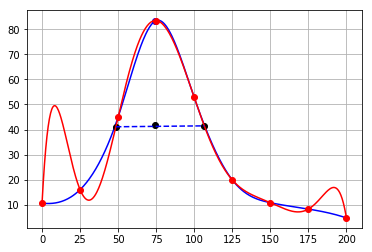

In [5]:
plt.plot(xinterp,y,'b')
plt.grid("on")
plt.plot(Erx,med,'ko')
plt.plot(gamma_x1,gamma_y1,'ko')
plt.plot(gamma_x2,gamma_y2,'ko')
plt.plot(Erx,Er,'bo')
plt.plot(a[:,0],a[:,1],'ro')
plt.plot(xinterp,punt,'r')
plt.plot([gamma_x1,gamma_x2],[gamma_y1,gamma_y2],'b--')